In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/Auto1-DS-TestData.csv')

symboling: Segurança do carro -> -3 é seguro +3 é arriscado  
normalized-losses: desvalorização do carro por ano normalizada  
make: modelo do carro  
fuel-type: tipo de combustivel  
aspiration: motor padrão ou turbo  
num-of-doors: número de portas  
body-style: conversivel, hatch, sedan etc   
drive-wheels: tração (4wd, fwd, rwd - tração dianteira, traseira ou 4x4)  
engine-location: localização do motor  
wheel-base: Distância entre as rodas  
length: comprimento
width: largura  
height: altura  
curb-weight: peso do carro com os acessórios padrões  
engine-type: tipos de motor (dohc, dohcv, l, ohc, ohcf, ohcv, rotor)  
num-of-cylinders: número de cilindros do carro 
engine-size: tamanho do motor  
fuel-system: sistema de combustivel  
bore:  diâmetro do cilindro do pistão  
stroke: distância que o pistão percorre em cada ciclo
compression-ratio: razao entre volume do cilindro e o volume do cilindro com a máxima compressão  
horse-power: potência do motor
peak-rpm: pico de rotação do carro
city-mpg: consumo de combustível (em milhas por gallon) na cidade
highway-mpg: consumo de combustível (em milhas por gallon) na estrada
price: preço do carro

Objetivo: Vender carro Online  
          Capacitar parceiro e cliente com liquidez (?)  
          Oferta  
          Foco: Clientes particulares e parceiros comerciais  
          missão de criar um mercado de confiança e transparente para a mobilidade.

Idéia 1: o carro em questão foi alterado? isso aumenta o risco? e o preço?
Idéia 2: 

In [39]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [17]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [22]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Preprocessing: Cleaning data, Feature Scaling

In [4]:
# cleaning up data based on price

data_price = data[data['price'] != '?']
data_price.loc[:,:].price = data_price.price.apply(lambda p: float(p))

/home/lucas/projects/auto1_test/venv/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


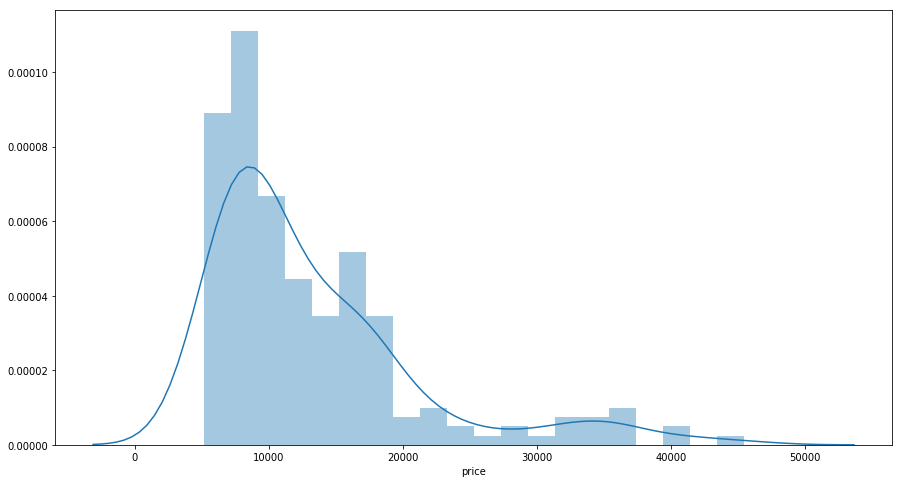

In [56]:
plt.figure(figsize = (15,8))
    sns.distplot(data_price['price'])

In [58]:
data_price[data_price['make'] == 'toyota']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
150,1,87.0,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,35,39,5348.0
151,1,87.0,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338.0
152,1,74.0,toyota,gas,std,four,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6488.0
153,0,77.0,toyota,gas,std,four,wagon,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918.0
154,0,81.0,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,7898.0
155,0,91.0,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,8778.0
156,0,91.0,toyota,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,6938.0
157,0,91.0,toyota,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,7198.0
158,0,91.0,toyota,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898.0
159,0,91.0,toyota,diesel,std,four,hatchback,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788.0


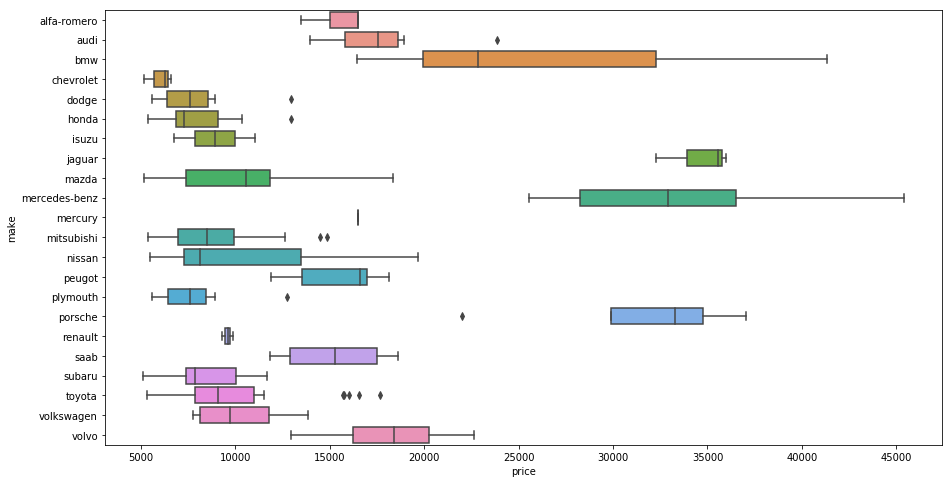

In [38]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'price', y = 'make', data = data_price)

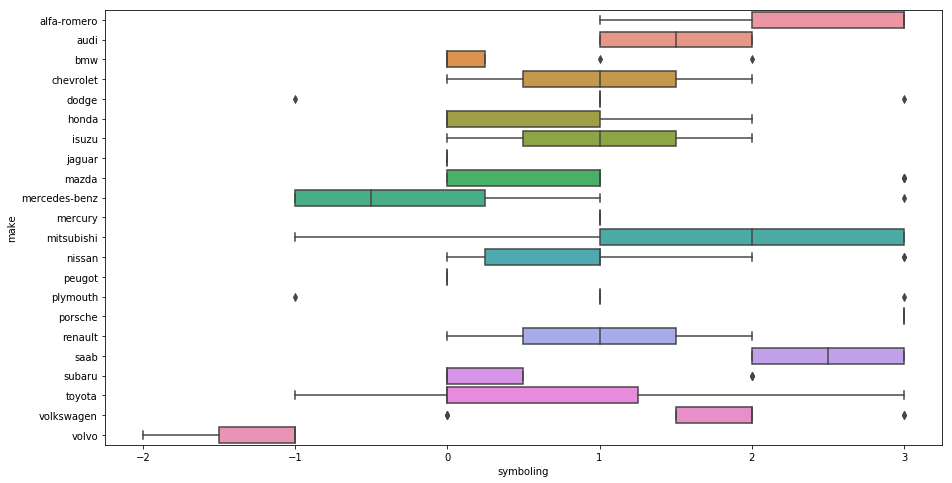

In [44]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'symboling', y = 'make', data = data_price)

In [50]:
def cast_losses(l):
    if l == '?':
        return None
    else:
        return float(l)

data_price['normalized-losses'] = data_price['normalized-losses'].apply(lambda l: cast_losses(l))

/home/lucas/projects/auto1_test/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


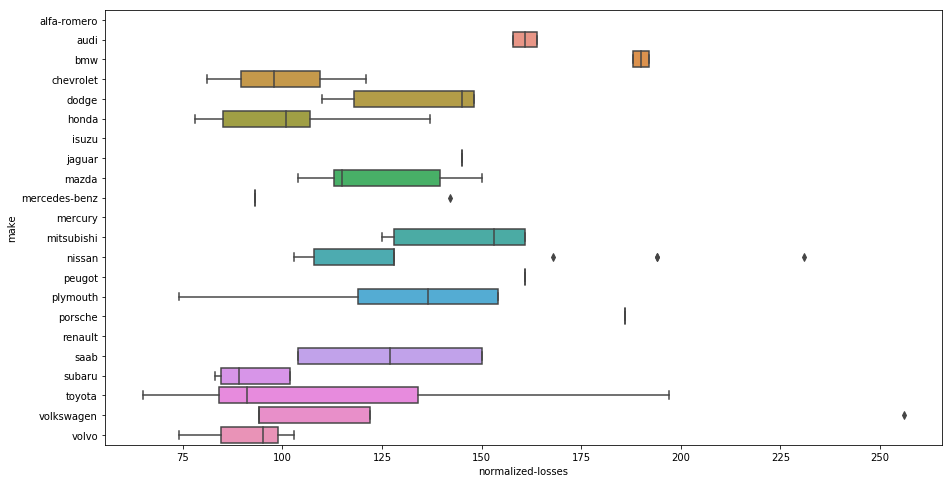

In [51]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'normalized-losses', y = 'make', data = data_price)

## Use case 1: Setting car price ranges, predict in which price range does a car fits into

In [5]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Elbow curve')

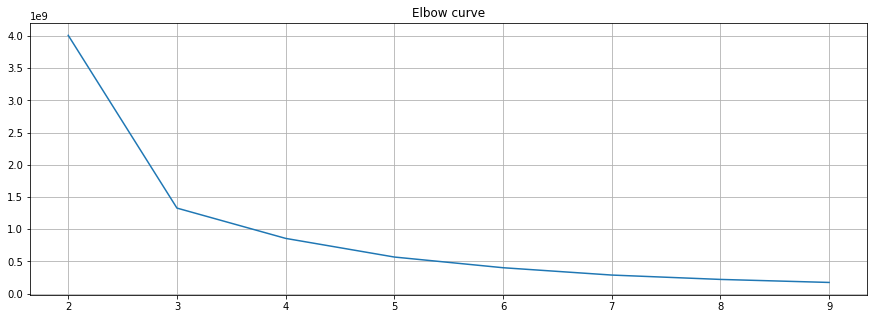

In [8]:
X = data_price['price'].values.reshape(-1,1)
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [14]:
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.7200402952468123
For n_clusters = 3 The average silhouette_score is : 0.6675036844858219
For n_clusters = 4 The average silhouette_score is : 0.5971792745311354
For n_clusters = 5 The average silhouette_score is : 0.6032886503588213
For n_clusters = 6 The average silhouette_score is : 0.6044148877552827
For n_clusters = 7 The average silhouette_score is : 0.5720015179895354
For n_clusters = 8 The average silhouette_score is : 0.5538761902707325
For n_clusters = 9 The average silhouette_score is : 0.5411267938376424


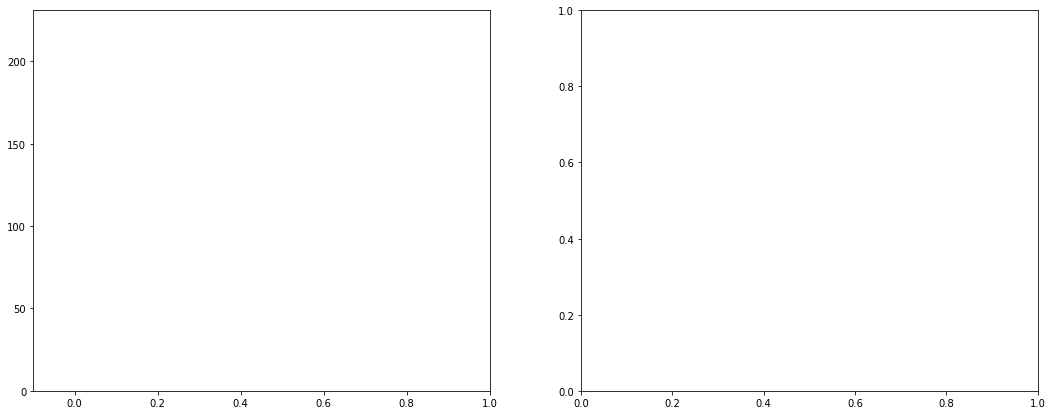

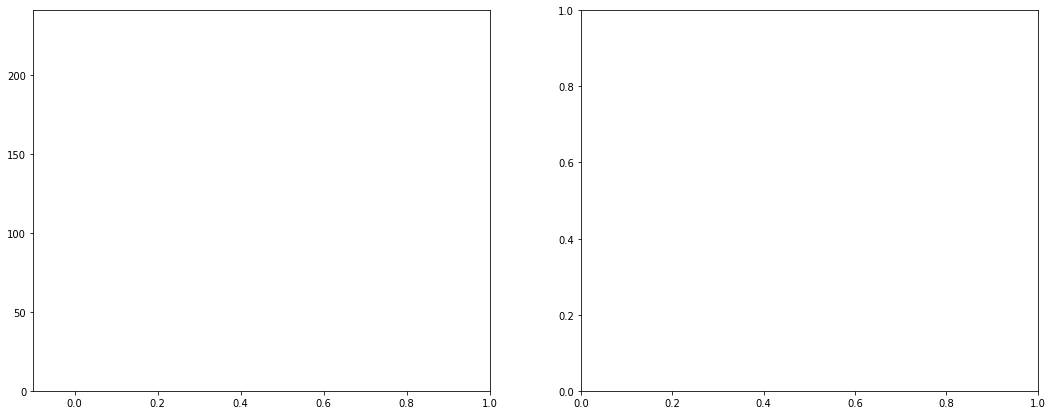

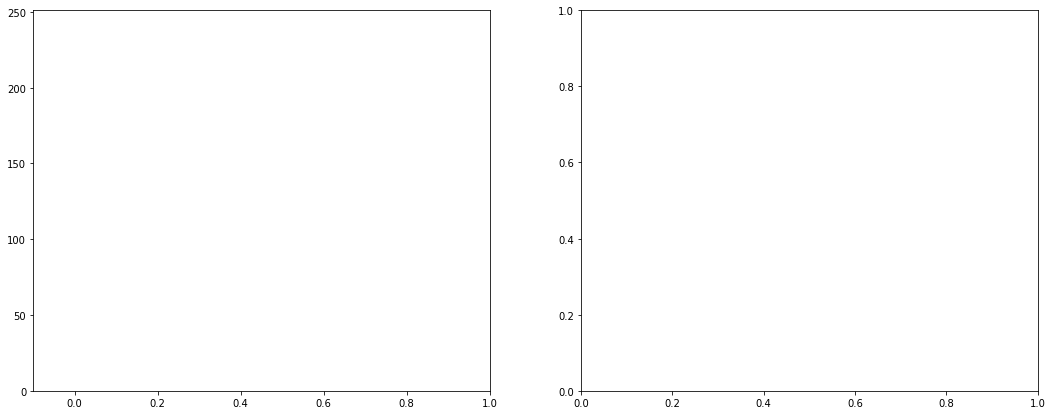

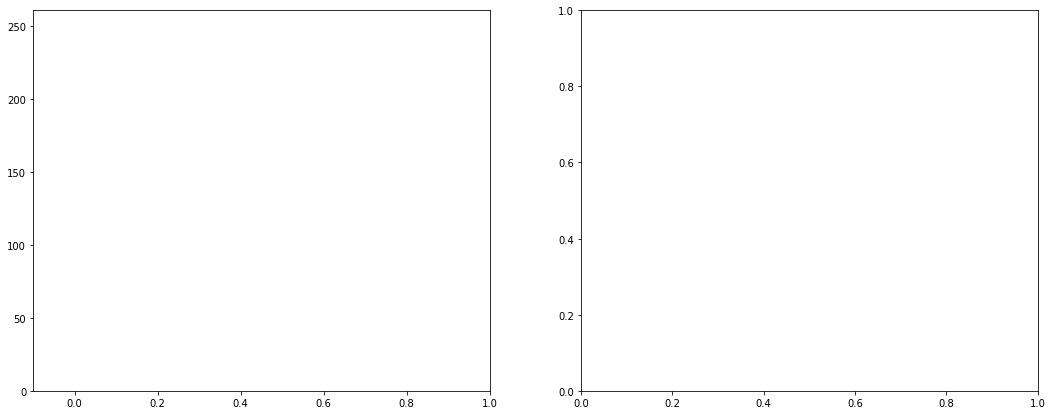

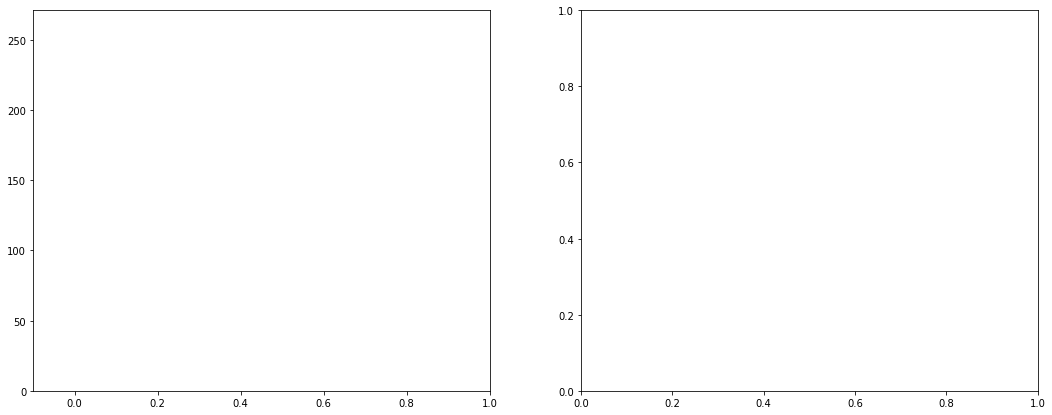

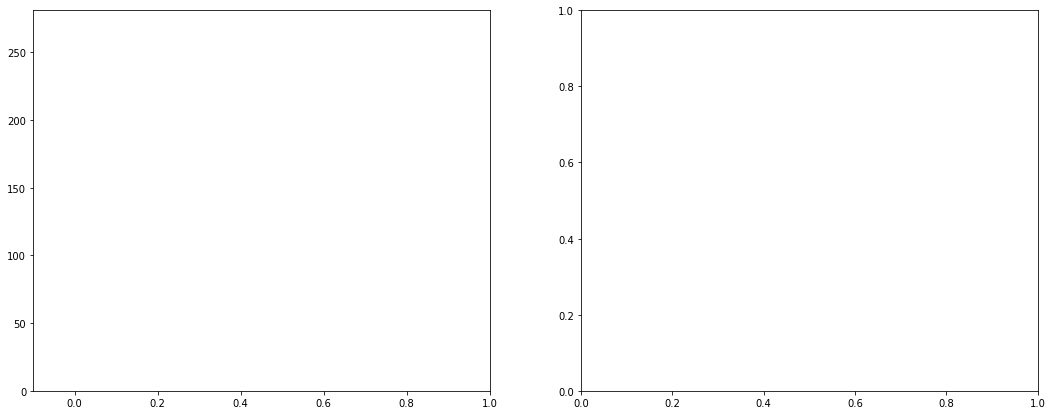

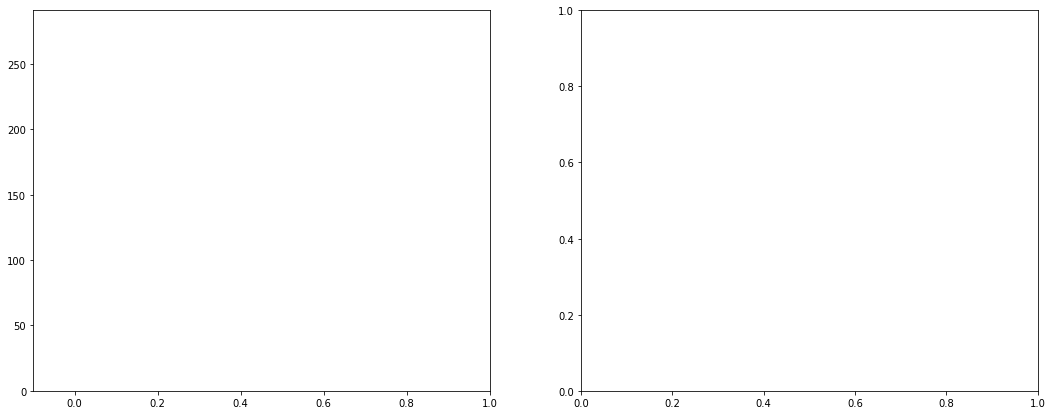

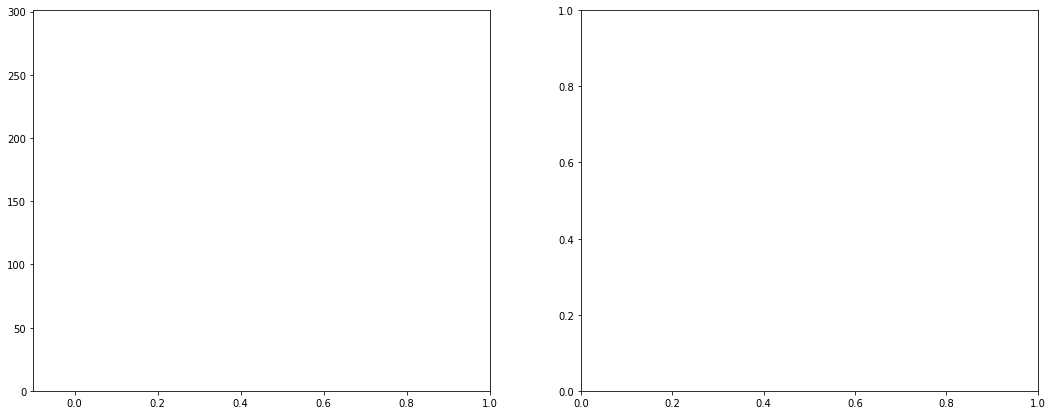

In [16]:
for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)